In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('madfhantr.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 2. Data Preprocessing

* Missing Value Processing
* Outlier Processing
* Feature Engineering

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

print('Remaining Null Values =',df.isnull().sum().sum())

Remaining Null Values = 0


In [59]:
df['Dependents'].replace('3+', 3,inplace=True) 
df['Dependents'].replace('3+', 3,inplace=True) 
df['Loan_Status'].replace('N', 0,inplace=True) 
df['Loan_Status'].replace('Y', 1,inplace=True)
df['Married'].replace('Yes', 1,inplace=True)
df['Married'].replace('No', 0,inplace=True)
df['Education'].replace('Graduate', 1,inplace=True)
df['Education'].replace('Not Graduate', 0,inplace=True) 
df['Self_Employed'].replace('Yes', 1,inplace=True) 
df['Self_Employed'].replace('No', 0,inplace=True) 

In [60]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1.0,1
1,LP001003,Male,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1.0,1
3,LP001006,Male,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1.0,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1.0,1


In [61]:
X = df.drop(['Loan_Status','Loan_ID','Gender','Property_Area'],axis=1)
y = df['Loan_Status']

In [62]:
X.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0
3,1,0,1,0,2583,2358.0,120.000000,360.0,1.0
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [65]:
clf = DecisionTreeClassifier()

In [66]:
clf = clf.fit(X_train, Y_train)

In [67]:
y_pred = clf.predict(X_test)

In [68]:
print("confusion matrix:\n")
print(metrics.confusion_matrix(Y_test, y_pred))

confusion matrix:

[[30 24]
 [22 78]]


In [69]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.3364167944785276, 0.9761904761904762, 'X[8] <= 0.5\ngini = 0.42\nsamples = 460\nvalue = [138, 322]'),
 Text(0.1549079754601227, 0.9285714285714286, 'X[5] <= 8115.0\ngini = 0.117\nsamples = 64\nvalue = [60, 4]'),
 Text(0.14263803680981596, 0.8809523809523809, 'X[4] <= 4836.0\ngini = 0.091\nsamples = 63\nvalue = [60, 3]'),
 Text(0.11809815950920245, 0.8333333333333334, 'X[7] <= 240.0\ngini = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(0.1058282208588957, 0.7857142857142857, 'X[4] <= 2546.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.09355828220858896, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11809815950920245, 0.7380952380952381, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.1303680981595092, 0.7857142857142857, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.16717791411042945, 0.8333333333333334, 'X[4] <= 4931.0\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.1549079754601227, 0.7857142857142857, 'gini = 0.0\nsamples

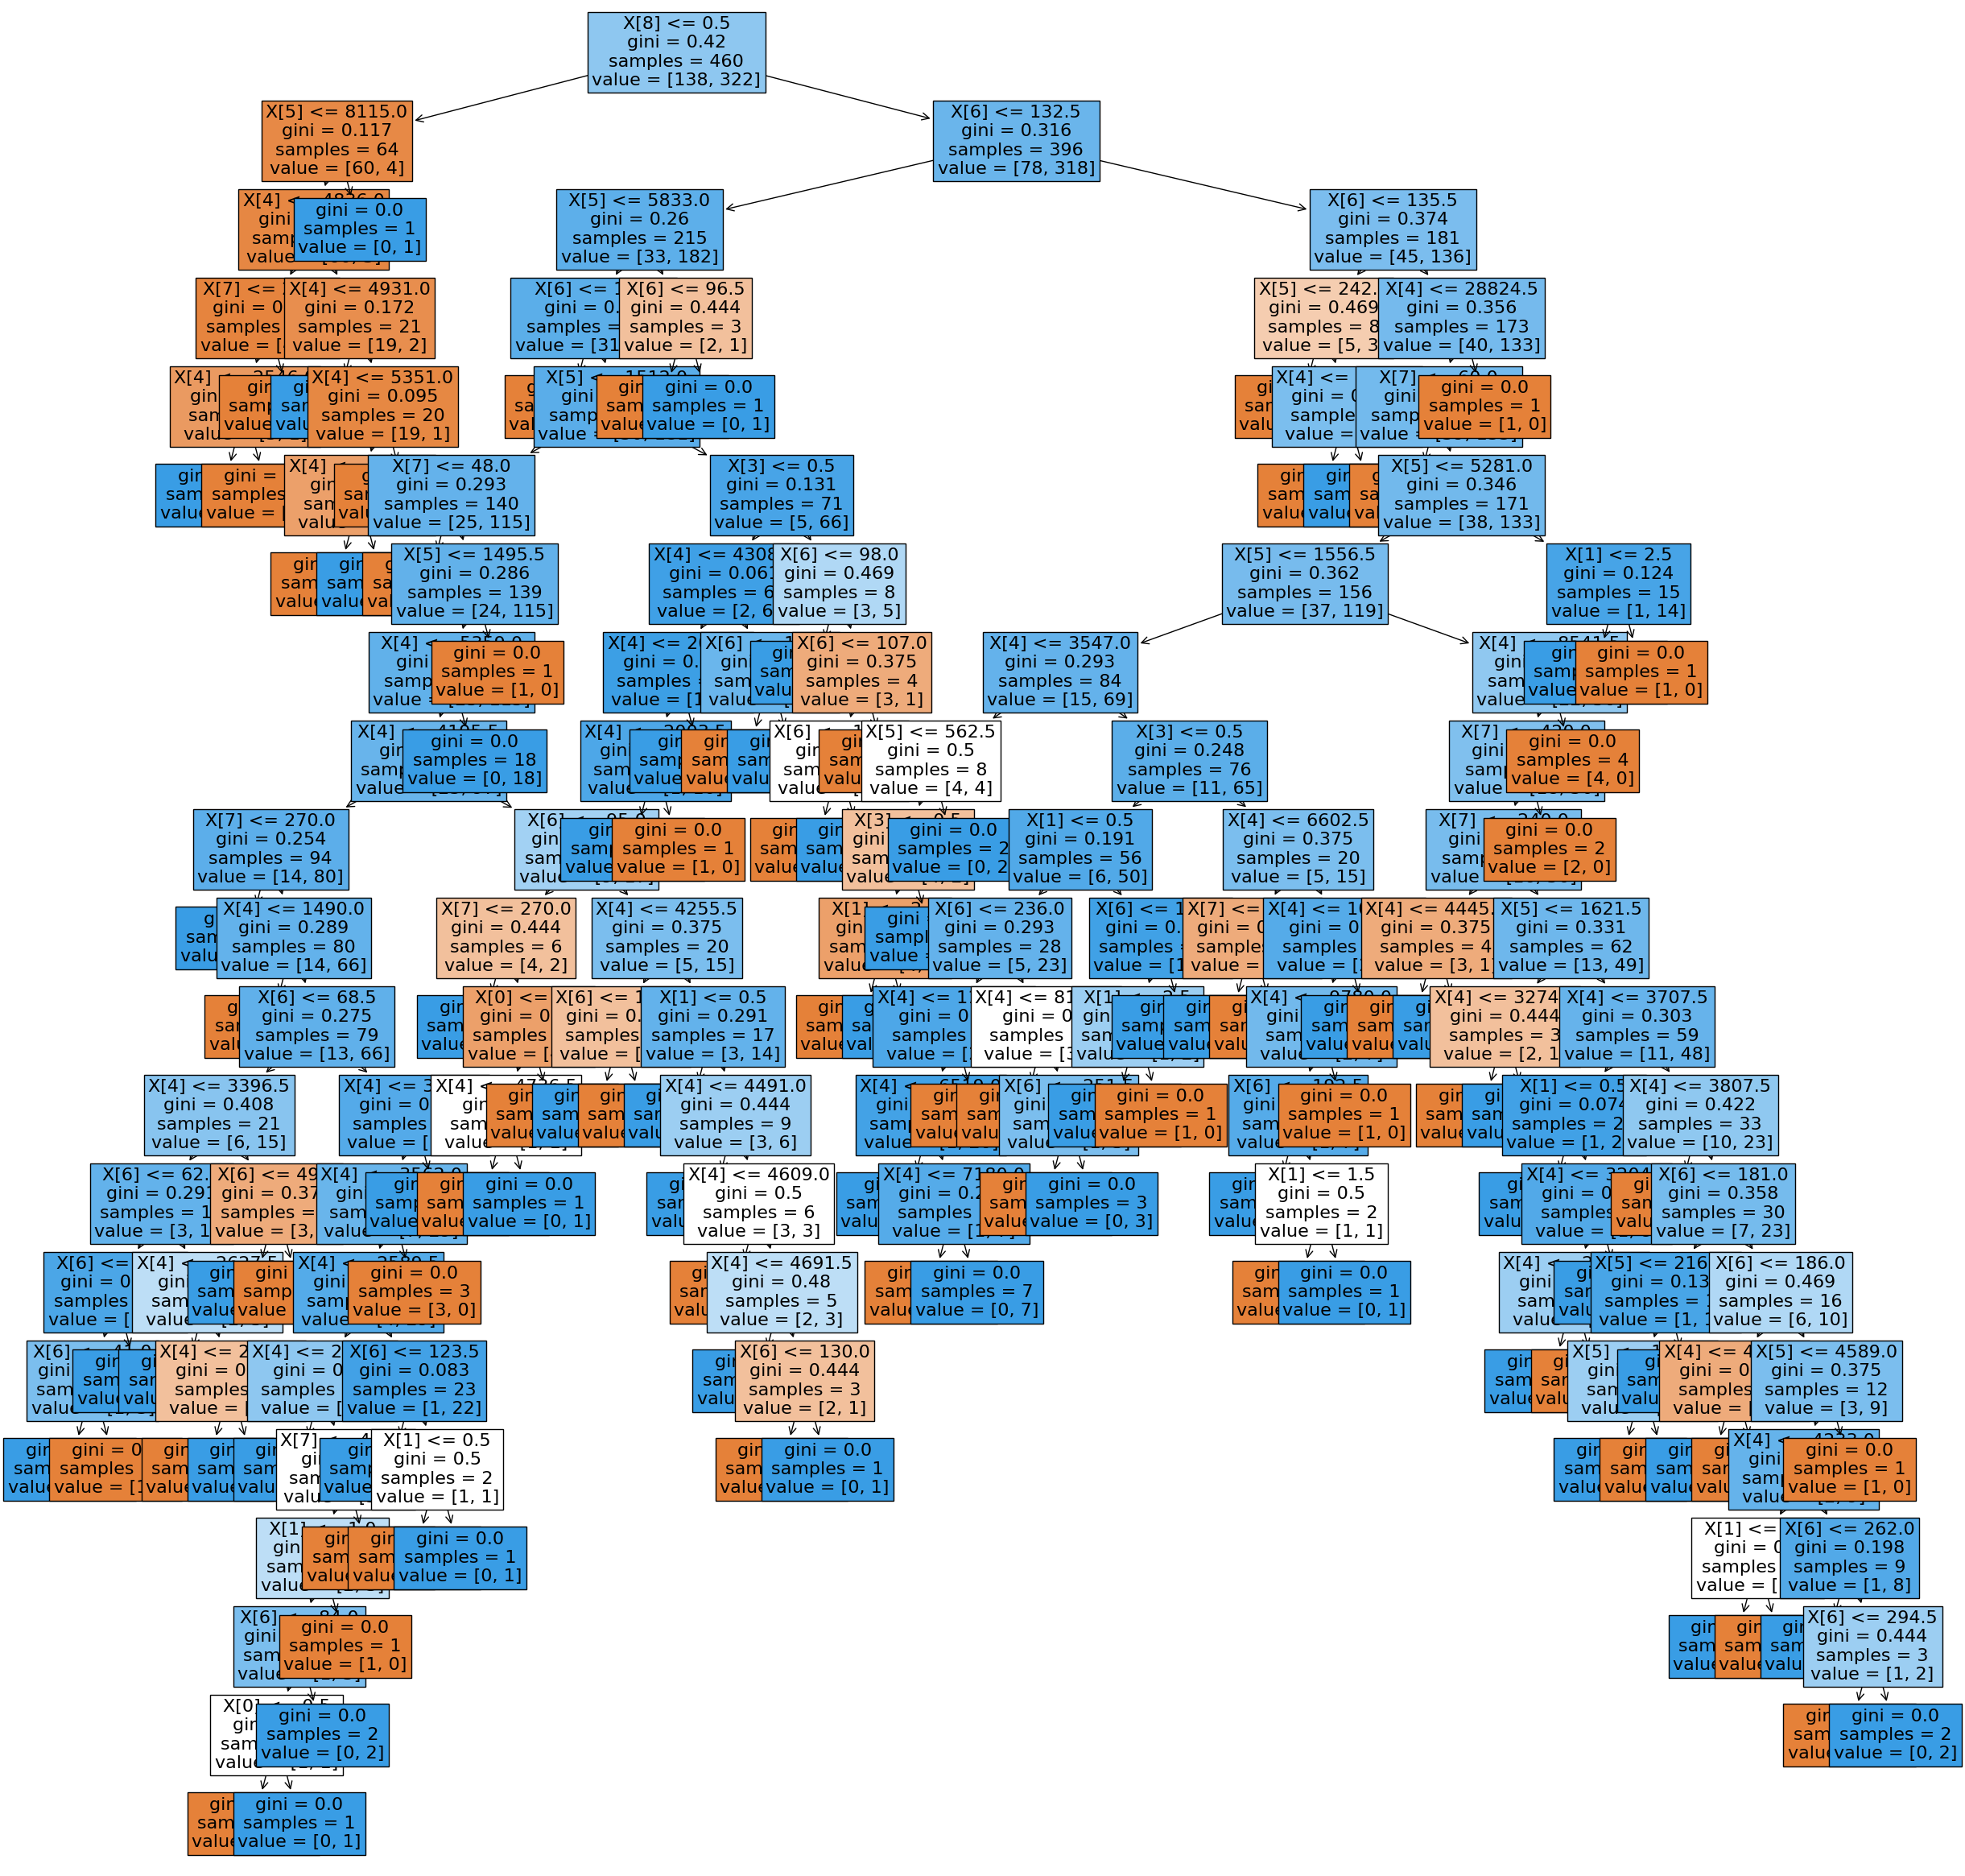

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(model, filled=True, fontsize=16)

In [71]:
print("1. Accuracy Score:", metrics.accuracy_score(Y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(Y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(Y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(Y_test, y_pred))

1. Accuracy Score: 0.7012987012987013
2. Precision Score: 0.7647058823529411
3. Recall Score: 0.78
4. f1 Score: 0.7722772277227723
